<a href="https://colab.research.google.com/github/Wiimmbo/Sistema-Inmune-Artificial/blob/main/NegativeSelectionAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NSA IMPLEMENTATION

In [7]:
import numpy as np
import matplotlib.pyplot as plt

##NSA

In [8]:
class NSA:
    """
    Negative Selection Algorithm (NSA) class.
    """
    def __init__(self) -> None:
        """
        Class constructor.
        """
        pass

    def generate_detectors(self, num_detectors: int, shape: tuple, data_range: tuple) -> np.ndarray:
        """
        Generate random detectors in the specified data range.

        Parameters:
        num_detectors (int): Number of detectors to generate.
        data_range (tuple): Range of the data.

        Returns:
        np.ndarray: Random detectors.
        """
        return np.random.uniform(low=data_range[0]*3, high=data_range[1]*3, size=(num_detectors, *shape))

    def get_affinity(self, detector: np.ndarray, data_point: np.ndarray) -> float:
        """
        Get the affinity (distance) between a detector and a data point.

        Parameters:
        detector (float): Detector value.
        data_point (float): Data point value.

        Returns:
        float: Affinity between the detector and the data point.
        """
        #Euclidean distance
        return np.sqrt(np.sum((detector - data_point)**2))

    def fit(self, self_data: np.ndarray, num_detectors: int, threshold: float) -> None:
        """
        Fit the NSA model. (Generate valid detectors)

        Parameters:
        self_data (np.ndarray): Self data. (Data that valid detectors should not recognize)
        num_detectors (int): Number of detectors to generate.
        threshold (float): Recognition threshold.
        """
        #Model parameters
        self.self_data = self_data
        self.num_detectors = num_detectors
        self.threshold = threshold

       # Visualize self data
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self_data[:, 0], self_data[:, 1], self_data[:, 2], c='blue', label='Self Data')
        ax.set_title('NSA Model')
        ax.set_xlabel('Sent Packages')
        ax.set_ylabel('Package Mean Size')
        ax.set_zlabel('Feature 3')
        ax.text2D(0.05, 0.95, f'Self Data: {len(self.self_data)}', transform=ax.transAxes)

        ax.legend()
        plt.show()

        #Generate random detectors
        self.detectors = self.generate_detectors(num_detectors, self_data[0].shape, (np.min(self_data), np.max(self_data)))

        # Visualize detectors
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self_data[:, 0], self_data[:, 1], self_data[:, 2], c='blue', label='Self Data')
        ax.scatter(self.detectors[:, 0], self.detectors[:, 1], self.detectors[:, 2], color=(0, 0, 0, 0.15), label='Detectors')
        ax.set_title('NSA Model')
        ax.set_xlabel('Sent Packages')
        ax.set_ylabel('Package Mean Size')
        ax.set_zlabel('Feature 3')
        ax.text2D(0.05, 0.95, f'Self Data: {len(self.self_data)}', transform=ax.transAxes)
        ax.text2D(0.05, 0.90, f'Detectors: {len(self.detectors)}', transform=ax.transAxes)
        ax.legend()
        plt.show()


        #Initialize valid detectors
        valid_detectors = []

        #Censorship Process (Remove detectors that detect self data)
        for detector in self.detectors:
            valid = True
            for data_point in self.self_data:
                #Check if detector recognizes the data point (affinity < threshold)
                affinity = self.get_affinity(detector, data_point)
                if affinity < self.threshold:
                    valid = False
                    break
            #Add detector to valid detectors if not recognized
            if valid:
                valid_detectors.append(detector)

        #Save valid detectors
        self.valid_detectors = np.array(valid_detectors)

        # Visualize valid detectors
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.self_data[:, 0], self.self_data[:, 1], self.self_data[:, 2], c='blue', label='Self Data')
        ax.scatter(self.valid_detectors[:, 0], self.valid_detectors[:, 1], self.valid_detectors[:, 2], color=(0, 1, 0, 0.15), label='Valid Detectors')
        ax.set_title('NSA Model')
        ax.set_xlabel('Sent Packages')
        ax.set_ylabel('Package Mean Size')
        ax.text2D(0.05, 0.95, f'Self Data: {len(self.self_data)}', transform=ax.transAxes)
        ax.text2D(0.05, 0.90, f'Valid Detectors: {len(self.valid_detectors)}', transform=ax.transAxes)
        ax.set_zlabel('Feature 3')
        ax.legend()
        plt.show()



    def predict(self, test_data):
        # Visualize test data and self data
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.self_data[:, 0], self.self_data[:, 1], self.self_data[:, 2], c='blue', label='Self Data')
        ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c='black', label='Test Data')
        ax.set_title('NSA Model')
        ax.set_xlabel('Sent Packages')
        ax.set_ylabel('Package Mean Size')
        ax.set_zlabel('Feature 3')
        ax.text2D(0.05, 0.95, f'Self Data: {len(self.self_data)}', transform=ax.transAxes)
        ax.text2D(0.05, 0.90, f'Test Data: {len(test_data)}', transform=ax.transAxes)
        ax.legend()
        plt.show()

        # Initialize anomalies list
        anomalies = []
        not_anomalies = []

        # Check if each data point is recognized by any valid detector
        for data_point in test_data:
            recognized = False
            for detector in self.valid_detectors:
                # Check if detector recognizes the data point (affinity < threshold)
                if self.get_affinity(detector, data_point) < self.threshold:
                    recognized = True
                    break
            # Add data point to anomalies if recognized by any detector
            if recognized:
                anomalies.append(data_point)
            else:
                not_anomalies.append(data_point)

        not_anomalies = np.array(not_anomalies)
        anomalies = np.array(anomalies)

        # Visualize anomalies
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.self_data[:, 0], self.self_data[:, 1], self.self_data[:, 2], color=(0, 0, 1, 0.15), label='Self Data')
        ax.scatter(self.detectors[:, 0], self.detectors[:, 1], self.detectors[:, 2], color=(0, 0, 0, 0.15), label='Detectors')
        ax.scatter(not_anomalies[:, 0], not_anomalies[:, 1], not_anomalies[:, 2], c='green', label='Not Anomalies')
        ax.scatter(anomalies[:, 0], anomalies[:, 1], anomalies[:, 2], c='red', label='Anomalies')
        ax.set_title('NSA Model')
        ax.set_xlabel('Sent Packages')
        ax.set_ylabel('Package Mean Size')
        ax.set_zlabel('Feature 3')
        ax.text2D(0.05, 0.95, f'Self Data: {len(self.self_data)}', transform=ax.transAxes)
        ax.text2D(0.05, 0.90, f'Detectors: {len(self.detectors)}', transform=ax.transAxes)
        ax.text2D(0.05, 0.85, f'Anomalies: {len(anomalies)}', transform=ax.transAxes)
        ax.text2D(0.05, 0.80, f'Not Anomalies: {len(not_anomalies)}', transform=ax.transAxes)
        ax.legend()
        plt.show()

        # Return anomalies
        return anomalies

#Testing

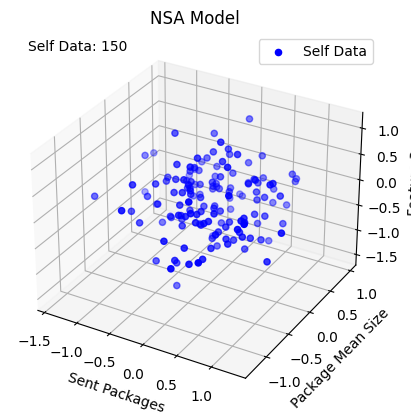

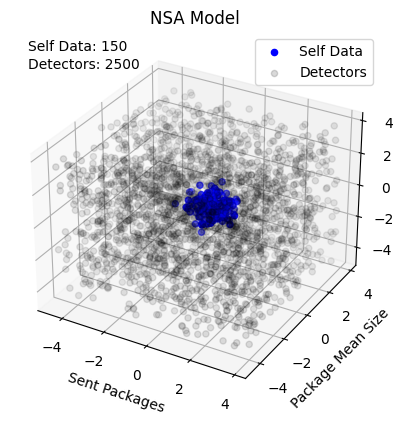

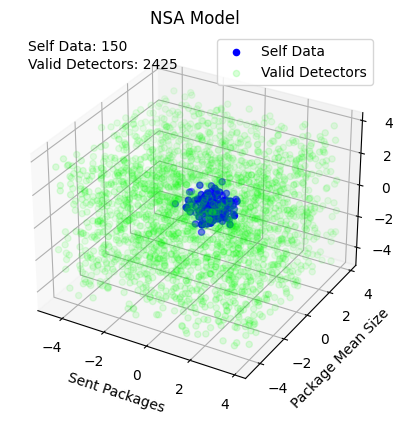

In [4]:
#@title Testing
#Initialize NSA model
nsa = NSA()

#@markdown #Generating Sample Data

#@markdown ---
#@markdown ###Generate self data with normal distribution
MEAN = 0 #@param {type:"number"}
STD = 0.5 #@param {type:"number"}
#@markdown ---
#Generate random self data
self_data = np.random.normal(loc=MEAN, scale=STD, size=450)
self_data = self_data.reshape(150, 3)

#Get the valid detectors
#@markdown ###Fit the model
N_DETECTORS = 2000 #@param {type:"slider", min : 1000, max:10000, step:1000}
THRESHOLD = 0.1 #@param {type:"slider", min : 0.1, max:10, step:0.1}
#@markdown ---
nsa.fit(self_data, num_detectors=2500, threshold=0.5)

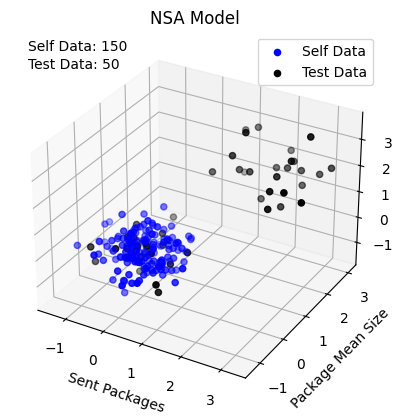

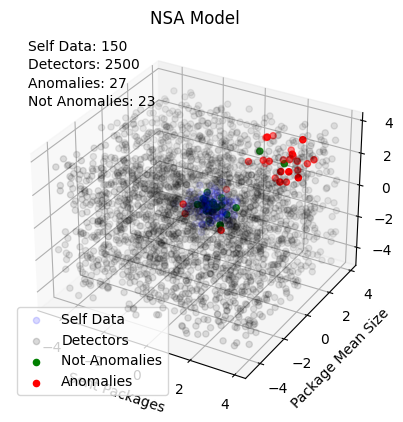

In [6]:
#@title Predict Test Data
#Test data

#@markdown ---
#@markdown ###Generate self data with normal distribution
MEAN = 0 #@param {type:"number"}
STD = 0.5 #@param {type:"number"}
#@markdown ---


#@markdown ###Generate anomalies with normal distribution
MEAN_2 = 2 #@param {type:"number"}
STD_2 = 0.75 #@param {type:"number"}
#@markdown ---

not_anomalies = np.random.normal(loc=MEAN, scale=STD, size=75)
anomalies = np.random.normal(loc=MEAN_2, scale=STD_2, size=75)
test_data = np.concatenate((not_anomalies, anomalies))
test_data = test_data.reshape(50, 3)

anomalies = nsa.predict(test_data)